## Número de agrupaciones utilizando gráfica K-Elbow

En este primer tema comenzaremos por cargar y visualizar algunas propiedades de una de las Bases de Datos de estudio que estaremos utilizando. Aprenderás a agrupar datos usando la biblioteca de Python Scikit-Learn y a determinar el número adecuado de agrupaciones a partir de la gráfica K-Elbow. 

Posiblemente el algoritmo de agrupamiento más conocido y utilizado es el K-means, por lo que agruparemos datos con este algoritmo. De sus varios parámetros, el más importante es el número de agrupaciones que se desea obtener. El resto de los parámetros del algoritmo no los estaremos analizando por el momento.

Iniciemos cargando la Base de Datos Iris desde Scikit-Learn. Esta Base de Datos describe las características de 150 plantas Iris divididas en 3 grupos (especies). Esas características son: largo del tallo, ancho del tallo, largo de pétalo y ancho del pétalo. Para tener una idea de la distribución de los datos, grafiquemos las últimas dos características.

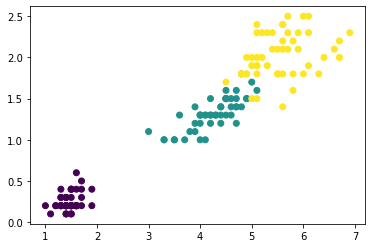

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics
from sklearn import cluster, datasets



iris = datasets.load_iris()
X = np.array(iris.data)
y = np.array(iris.target)
plt.scatter(X[:, 2], X[:, 3], c=y)

Como se puede apreciar, hay dos especies parecidas y una tercera con características diferentes. Si no conociéramos previamente esta información no sabríamos si, al agrupar los datos, debemos hacerlo en dos, tres o más grupos. Una estrategia muy utilizada es agrupar con distintas cantidades de grupo y escoger la mejor agrupación según una medida de calidad o de validación de los resultados. Una “regla de dedo” es probar con una cantidad de grupos en un rango desde dos grupos hasta la raíz cuadrada de la cantidad de objetos.

Veamos como lo haríamos en Python guardando en un diccionario los resultados del índice de validación Silhouette.

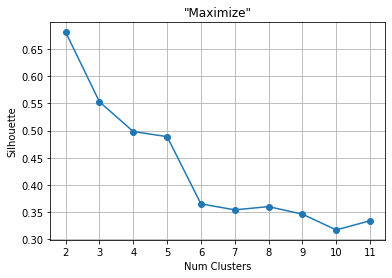

In [9]:
results = {}

for k in range(2, int(np.sqrt(len(X)))):
    k_means = cluster.KMeans(n_clusters=k).fit(X)
    y_pred = k_means.predict(X)
    results[k] = metrics.silhouette_score(X, y_pred)
    clusters_counts = list(results.keys())
    index_values = list(results.values())

# K-Elbow!
plt.plot(clusters_counts, index_values, 'o-')
plt.grid(True)
plt.title('"Maximize"')
plt.xlabel('Num Clusters')
plt.xticks(clusters_counts)
plt.ylabel('Silhouette')
plt.show()


Como se muestra en la imagen, los valores del índice Silhouette van decreciendo a medida que el número de grupos va en aumento. Con este índice, los valores más grandes significan mejores resultados del agrupamiento, por lo tanto, para dos grupos se obtuvo un mejor resultado que para tres. Tiene sentido si nos damos cuenta de que es más fácil separar los datos en dos grupos, poniendo en un grupo la especie que es muy diferente y en el otro las dos especies parecidas. Si no conociéramos el “ground truth” de las ‘tres’ especies, este resultado sería perfectamente válido.



¿Y por qué se llama la gráfica K-Elbow? Porque varios índices tienen tendencia a devolver siempre mayores o menores valores a medida que el número de grupos aumenta. En esos casos, en lugar de solo fijarnos en el mayor o menor valor, buscaríamos los ‘codos’ en la gráfica. Por ejemplo, hay un ‘codo’ para cinco grupos, por lo que probablemente ese agrupamiento es bastante mejor que formar seis grupos o cuatro grupos.



Ahora sabes cómo realizar varias tareas muy importantes dentro del proceso de agrupamiento de datos. Es más, podemos decir que eres capaz de resolver este problema con los datos de tu organización, ya que en el ejemplo anterior completamos todo el proceso de agrupamiento. Obviamente faltan muchos otros detalles por aprender, pero ya eres capaz de agrupar datos y escoger el número de grupos adecuados para el análisis, y eso en pocas líneas de código.